In [1]:
import numpy as np
import scipy.stats


import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt

font = {'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

from corrts import *

In [6]:
N = 1000
n = 2000

rgs = np.logspace(-3, -1, 25)


xs = []
for i in range(N): 
    xsi = []
    for r in rgs:
        x = sample_random_process(n, r=r,dt=1)
        xsi.append(x)

    xs.append(np.stack(xsi, 0))
xs = np.stack(xs, 0)

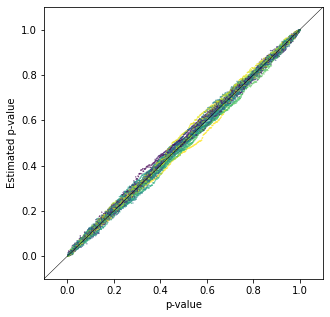

In [7]:
rs    = pearson_r(xs[:N // 2], xs[N // 2:])
edfs  = edfs_factor_rft(xs[:N // 2], xs[N // 2:])
pvals = z_pvalue(fisher_transform(rs), edfs * n, two_sided=False)
prank = 1-rank(rs,axis=0) / (N//2)


plt.figure(figsize=(5,5))
plt.plot([-0.1,1.1], [-0.1,1.1], 'k', linewidth=0.5)
plt.scatter(prank, pvals, s=0.1, c=np.tile(np.log10(rgs), N//2))
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('p-value')
plt.ylabel('Estimated p-value'); 

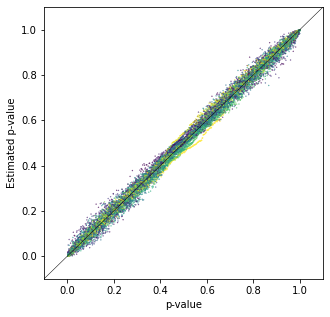

In [8]:
rs    = pearson_r(xs[:N // 2], xs[N // 2:])
edfs  = edfs_factor_quenouille(acf(xs[:N // 2], method='fft'), acf(xs[N // 2:], method='fft'))
pvals = z_pvalue(fisher_transform(rs), edfs * n, two_sided=False)
prank = 1-rank(rs,axis=0) / (N//2)


plt.figure(figsize=(5,5))
plt.plot([-0.1,1.1], [-0.1,1.1], 'k', linewidth=0.5)
plt.scatter(prank, pvals, s=0.1, c=np.tile(np.log10(rgs), N//2))
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('p-value')
plt.ylabel('Estimated p-value'); 

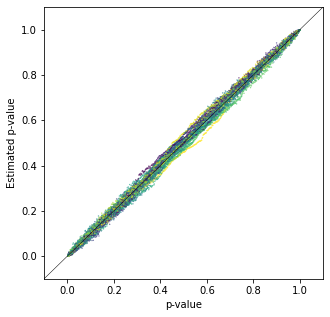

In [9]:
rs    = pearson_r(xs[:N // 2], xs[N // 2:])
edfs  = edfs_factor_quenouille(acf(xs[:N // 2], method='welch'), acf(xs[N // 2:], method='welch'))
pvals = z_pvalue(fisher_transform(rs), edfs * n, two_sided=False)
prank = 1-rank(rs,axis=0) / (N//2)


plt.figure(figsize=(5,5))
plt.plot([-0.1,1.1], [-0.1,1.1], 'k', linewidth=0.5)
plt.scatter(prank, pvals, s=0.1, c=np.tile(np.log10(rgs), N//2))
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('p-value')
plt.ylabel('Estimated p-value'); 

In [11]:
ns = 10**np.arange(2,9)
r = 1e-3

timings = {
    'ess_rft': [None] * ns.size,
    'acf_fft': [None] * ns.size,
    'acf_welch': [None] * ns.size,
}

for i, n in enumerate(ns):
    print(i, n)
    x = sample_random_process(n, r=r,dt=1)
    y = sample_random_process(n, r=r,dt=1)

    timings['ess_rft'][i] = %timeit -o edfs_factor_rft(x, y)
    timings['acf_fft'][i] = %timeit -o acf(x, method='fft')
    timings['acf_welch'][i] = %timeit -o acf(x, method='welch')
    

0 100
69 µs ± 617 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
47.8 µs ± 268 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
201 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1 1000
82.4 µs ± 1.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
74 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
240 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2 10000
128 µs ± 217 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
326 µs ± 1.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
381 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3 100000
573 µs ± 2.51 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.24 ms ± 18 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.78 ms ± 2.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4 1000000
9.39 ms ± 111 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
54.1 ms ± 375 µs per loop 

In [12]:
average_timings = {k: [vi.average if k == 'ess_rft' else vi.average * 2 for vi in v] for k, v in timings.items() if None not in v}

In [15]:
fig = px.bar(average_timings, barmode='group', log_y=True)
fig.update_layout(template='plotly_white', width=500, height=400)

In [68]:
average_timings = {k: [vi.average/timings['ess_rft'][i].average if k == 'ess_rft' else vi.average * 2/timings['ess_rft'][i].average for i, vi in enumerate(v)] for k, v in timings.items() if None not in v}

In [ ]:
nti

In [94]:
fig = px.bar(average_timings, barmode='group')
fig.update_xaxes(title_text='Number of points')
fig.update_yaxes(title_text='Speedup')

fig.update_layout(template='plotly_white', width=500, height=400)

In [66]:
T  = np.asarray([*average_timings.values()]) 
rT = (T - T[0]) / T[0] 
mT = T.mean(1)
mT = mT / mT[0]


# speedup = 1/(rT + 1).mean(1)
fig = px.bar(x=['Ours', 'FFT', 'Welch'], y=mT, barmode='group', text=[f'x{_:.1f}' for _ in mT])
fig.update_yaxes(title_text='Average speedup')
fig.update_xaxes(title_text='Compared method')
fig.update_layout(height=400, width=300, template='plotly_white')

fig.write_image('./mean_computation_time.pdf', scale=2)
fig.write_image('./mean_computation_time.png', scale=2)
fig